In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('spam.csv', encoding='latin=1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

# data cleaning

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   target   5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [5]:
# drop lat 3 columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace=True)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
# rename v1,v2 
df.rename(columns={'v1':'target','v2':'message'}, inplace=True)
df.head(2)

,target,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   target   5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [12]:
df.describe()

,target,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [13]:
df.head()

,target,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
df.isnull().sum().sum()

0

In [17]:
df.duplicated().sum()

403

In [26]:
df=df.drop_duplicates(keep='first')

In [27]:
df.duplicated().sum()

0

In [28]:
df.shape

(5169, 2)

In [54]:
from sklearn.preprocessing import LabelEncoder

In [55]:
df['target']=LabelEncoder().fit_transform(df['target'])

In [64]:
df.head()

,target,message,clean_message
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah dont think goes usf lives around though


# ham=0, spam=1

In [56]:
df.tail()

,target,message,clean_message
5567,1,This is the 2nd time we have tried 2 contact u...,2nd time tried 2 contact u u å£750 pound prize...
5568,0,Will Ì_ b going to esplanade fr home?,ì b going esplanade fr home
5569,0,"Pity, * was in mood for that. So...any other s...",pity mood soany suggestions
5570,0,The guy did some bitching but I acted like i'd...,guy bitching acted like id interested buying s...
5571,0,Rofl. Its true to its name,rofl true name


In [57]:
import string
import nltk
from nltk.corpus import stopwords

In [58]:
# Download the stopwords from NLTK
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bossh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [59]:
def preprocess_text(text):
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Convert to lowercase
    text = text.lower()
    # Remove stopwords
    words = text.split()
    words = [word for word in words if word not in stopwords.words('english')]
    return ' '.join(words)

df['clean_message'] = df['message'].apply(preprocess_text)
print(df.head())


   target                                            message  \
0       0  Go until jurong point, crazy.. Available only ...   
1       0                      Ok lar... Joking wif u oni...   
2       1  Free entry in 2 a wkly comp to win FA Cup fina...   
3       0  U dun say so early hor... U c already then say...   
4       0  Nah I don't think he goes to usf, he lives aro...   

                                       clean_message  
0  go jurong point crazy available bugis n great ...  
1                            ok lar joking wif u oni  
2  free entry 2 wkly comp win fa cup final tkts 2...  
3                u dun say early hor u c already say  
4        nah dont think goes usf lives around though  


# EDA

In [36]:
df.head()

,target,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [35]:
df['message'].value_counts()

message
Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...                                               1
Wake me up at  &lt;#&gt;  am morning:)                                                                                                                        1
I will reach ur home in  &lt;#&gt;  minutes                                                                                                                   1
Wait.i will come out.. &lt;#&gt;  min:)                                                                                                                       1
R u here yet? I'm wearing blue shirt n black pants.                                                                                                           1
                                                                                                                                                             ..
;-( oh well, c u later          

In [33]:
df['target'].value_counts()

target
ham     4516
spam     653
Name: count, dtype: int64

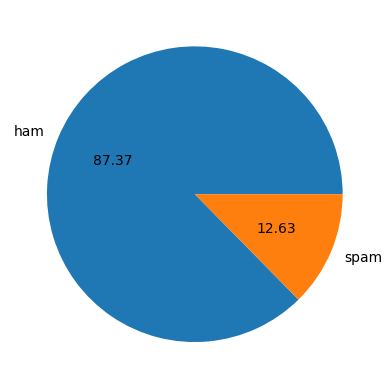

In [31]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

# FEATURE EXTRACTION

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=3000)

# Fit and transform the clean message column
X = vectorizer.fit_transform(df['clean_message'])

# Convert labels to binary values (ham=0, spam=1)
y = df['target'].map({'ham': 0, 'spam': 1})


In [45]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9516441005802708
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       889
           1       0.94      0.70      0.80       145

    accuracy                           0.95      1034
   macro avg       0.94      0.85      0.89      1034
weighted avg       0.95      0.95      0.95      1034



In [50]:
model.score(X_test,y_test)

0.9516441005802708

# Data Visualization

C:\Users\bossh\AppData\Local\Temp\ipykernel_13400\1895573982.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df, palette='viridis')


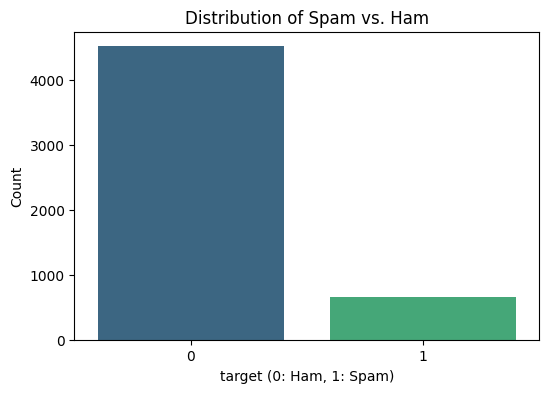

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution
plt.figure(figsize=(6,4))
sns.countplot(x='target', data=df, palette='viridis')
plt.title('Distribution of Spam vs. Ham')
plt.xlabel('target (0: Ham, 1: Spam)')
plt.ylabel('Count')
plt.show()

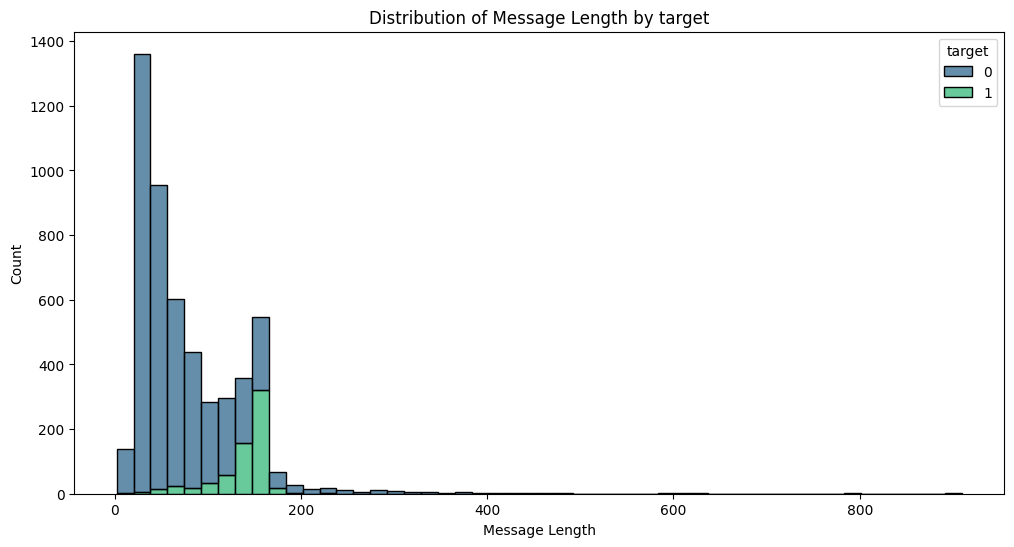

In [74]:
# Add a new feature for message length
df['message_length'] = df['message'].apply(len)

# Plot the distribution of message length
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='message_length', hue='target', multiple='stack', palette='viridis', bins=50)
plt.title('Distribution of Message Length by target')
plt.xlabel('Message Length')
plt.ylabel('Count')
plt.show()


In [82]:
pip install WordCloud

   ---------------------------------------- 0.0/301.4 kB ? eta -:--:--
   - -------------------------------------- 10.2/301.4 kB ? eta -:--:--
   --- ----------------------------------- 30.7/301.4 kB 435.7 kB/s eta 0:00:01
   ------------------- -------------------- 143.4/301.4 kB 1.2 MB/s eta 0:00:01
   --------------------------------- ------ 256.0/301.4 kB 1.6 MB/s eta 0:00:01
   ---------------------------------------- 301.4/301.4 kB 1.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip


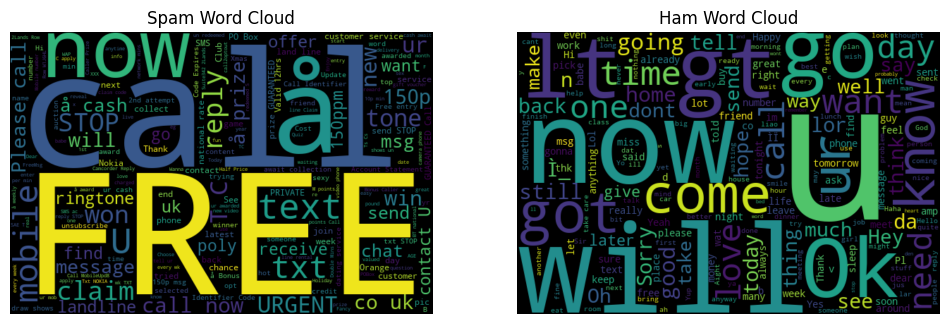

In [83]:
from wordcloud import WordCloud

# Generate word clouds
spam_words = ' '.join(list(df[df['target'] == 1]['message']))
ham_words = ' '.join(list(df[df['target'] == 0]['message']))

spam_wordcloud = WordCloud(width=600, height=400).generate(spam_words)
ham_wordcloud = WordCloud(width=600, height=400).generate(ham_words)

# Plot the word clouds
plt.figure(figsize=(12, 8))

plt.subplot(1, 2, 1)
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.title('Spam Word Cloud')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.title('Ham Word Cloud')
plt.axis('off')

plt.show()


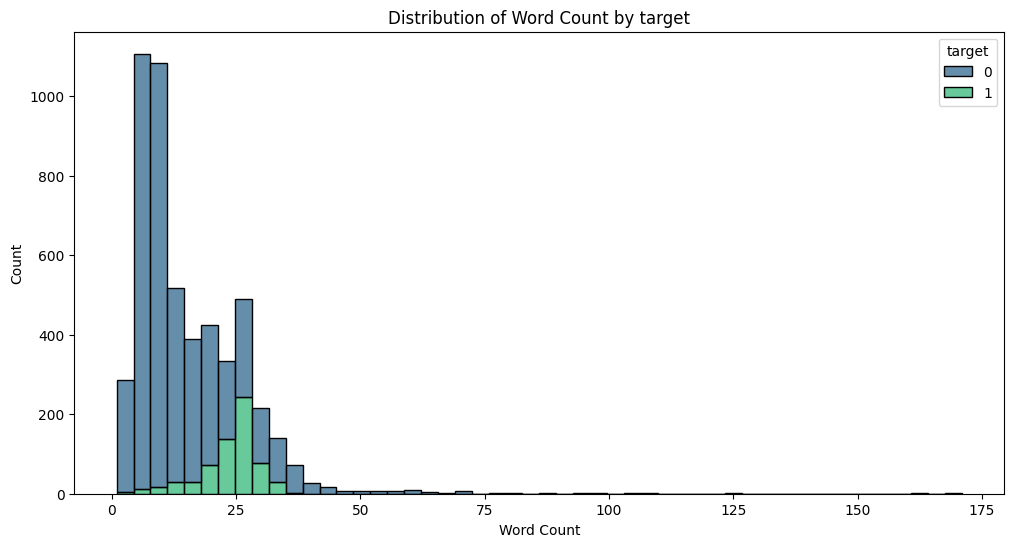

In [81]:
# Additional features can be added and visualized here, such as word count, punctuation count, etc.

# Example: Word count
df['word_count'] = df['message'].apply(lambda x: len(x.split()))

# Plot the distribution of word count
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='word_count', hue='target', multiple='stack', palette='viridis', bins=50)
plt.title('Distribution of Word Count by target')
plt.xlabel('Word Count')
plt.ylabel('Count')
plt.show()
